In [2]:
import SN_rates as sn
import numpy as np
import scipy.integrate as integ
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 504x360 with 0 Axes>

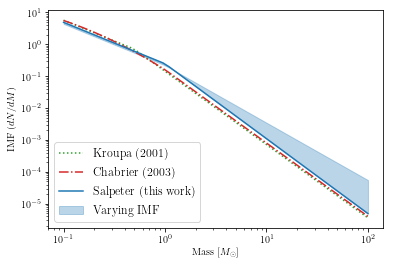

In [3]:
massrange = np.logspace(-1,2)
kroupa = np.where(massrange<0.5, massrange**-1.3, 0.5*massrange**-2.3)
kroupa /= integ.simps(kroupa, x=massrange)
chabrier = np.where(massrange<1, 0.158*(1/(np.log(10)*massrange))*np.exp(-(np.log10(massrange)-np.log10(0.08))**2/(2*0.69**2)), 0.158*(1/(np.log(10)*1.0))*np.exp(-(np.log10(1.0)-np.log10(0.08))**2/(2*0.69**2))*massrange**-2.3)
chabrier /= integ.simps(chabrier, x= massrange)
varying18 = np.where(massrange<1, massrange**-1.3, massrange**-1.8)
varying18 /= integ.simps(varying18, x=massrange)
varying235 = np.where(massrange<1, massrange**-1.3, massrange**-2.35)
varying235 /= integ.simps(varying235, x=massrange)

plt.figure(figsize=(7,5))
fig, ax = plt.subplots()
plt.plot(massrange, kroupa, label='Kroupa (2001)', ls = ':', color = 'C2')
plt.plot(massrange, chabrier, label='Chabrier (2003)', ls = '-.', color = 'C3')
plt.fill_between(massrange, varying18, varying235, alpha=0.3, label='Varying IMF', color = 'C0')
plt.plot(massrange, varying235, label='Salpeter (this work)', ls = '-', color='C0')

plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=12, loc='lower left')
plt.ylabel(r'IMF ($dN/dM$)')
plt.xlabel(r'Mass [$M_\odot$]')
plt.savefig('../plots/IMF.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


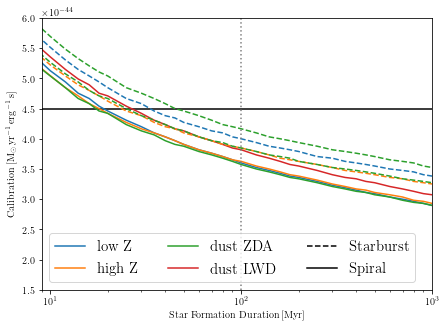

In [14]:
age, calibspa, calibspb, calibspc, calibspd = np.loadtxt('../Data/Calibration/SFcalibration_spiral_2.35.dat', unpack=True, skiprows=1)
age, calibsba, calibsbb, calibsbc, calibsbd = np.loadtxt('../Data/Calibration/SFcalibration_starburst_2.35.dat', unpack=True, skiprows=1)
plt.figure(figsize=(7,5))
plt.semilogx(age, calibspa, label = 'low Z', color = 'C0')
plt.semilogx(age, calibspb, label = 'high Z', color = 'C1')
plt.semilogx(age, calibspc, label = 'dust ZDA', color = 'C2')
plt.semilogx(age, calibspd, label = 'dust LWD', color = 'C3')
plt.semilogx(age, calibsba, ls = '--', color = 'C0')
plt.semilogx(age, calibsbb, ls = '--', color = 'C1')
plt.semilogx(age, calibsbc, ls = '--', color = 'C2')
plt.semilogx(age, calibsbd, ls = '--', color = 'C2')

plt.hlines(4.5e-44, 9, 1000, color = 'black')

plt.semilogx([0,1], [-1,-1], label='Starburst', color='k', ls='--')
plt.semilogx([0,1], [-1,-1], label='Spiral', color='k')

plt.axvline(x=100, color='gray', ls=':')

plt.xlim(9,1000)
plt.ylim(0.15e-43,0.6e-43)
plt.xlabel('Star Formation Duration [Myr]')
plt.ylabel('Calibration $[\mathrm{M_{\odot}\,yr^{-1}\,erg^{-1}\,s}]$')
plt.legend(fontsize=15, ncol=3, loc='lower left')
plt.savefig('../plots/Calib_range.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


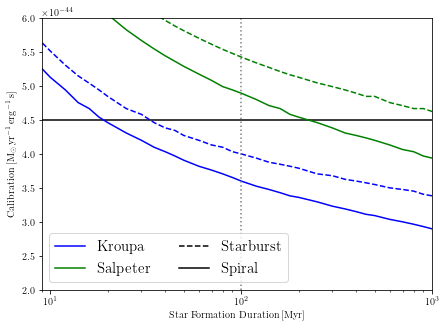

In [4]:
age, calibspsal = np.loadtxt('../Data/Calibration/SFcalibration_spiral_Sal.dat', unpack=True, skiprows=1, usecols=(0,1))
age, calibsbsal= np.loadtxt('../Data/Calibration/SFcalibration_starburst_Sal.dat', unpack=True, skiprows=1, usecols=(0,1))
age, calibspkro = np.loadtxt('../Data/Calibration/SFcalibration_spiral_2.35.dat', unpack=True, skiprows=1, usecols=(0,1))
age, calibsbkro = np.loadtxt('../Data/Calibration/SFcalibration_starburst_2.35.dat', unpack=True, skiprows=1, usecols=(0,1))

plt.figure(figsize=(7,5))
plt.semilogx(age, calibspkro, label = 'Kroupa', color = 'C0', ls='-')
plt.semilogx(age, calibsbkro, color = 'blue', ls='--')
plt.semilogx(age, calibspsal, label = 'Salpeter', color = 'C2', ls='-')
plt.semilogx(age, calibsbsal, color = 'green', ls='--')

plt.hlines(4.5e-44, 9, 1000, color = 'black')

plt.semilogx([0,1], [-1,-1], label='Starburst', color='k', ls='--')
plt.semilogx([0,1], [-1,-1], label='Spiral', color='k')

plt.axvline(x=100, color='gray', ls=':')

plt.xlim(9,1000)
plt.ylim(0.2e-43,0.6e-43)
plt.xlabel('Star Formation Duration [Myr]')
plt.ylabel('Calibration $[\mathrm{M_{\odot}\,yr^{-1}\,erg^{-1}\,s}]$')
plt.legend(fontsize=15, ncol=2, loc='lower left')
plt.savefig('../plots/Calib_SalpeterKroupa.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


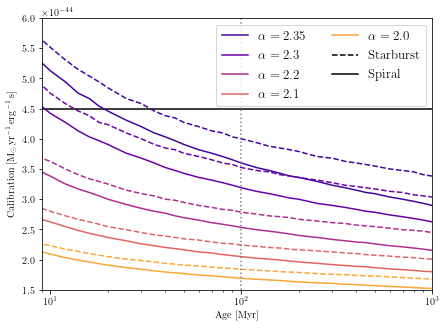

In [17]:
age, calibsp1, calibsp2, calibsp3, calibsp4, calibsp5 = np.loadtxt('../Data/Calibration/SFcalibration_spiral.dat', unpack=True, skiprows=1)
age, calibsb1, calibsb2, calibsb3, calibsb4, calibsb5 = np.loadtxt('../Data/Calibration/SFcalibration_starburst.dat', unpack=True, skiprows=1)

plt.figure(figsize=(7,5))

plasma = matplotlib.cm.get_cmap('plasma')

plt.semilogx(age, calibsp5, label=r'$\alpha = -2.35$', color = plasma(0.1))
plt.semilogx(age, calibsp4, label=r'$\alpha = -2.3$', color = plasma(0.2))
plt.semilogx(age, calibsp3, label=r'$\alpha = -2.2$', color = plasma(0.4))
plt.semilogx(age, calibsp2, label=r'$\alpha = -2.1$', color = plasma(0.6))
plt.semilogx(age, calibsp1, label=r'$\alpha = -2.0$', color = plasma(0.8))

plt.semilogx(age, calibsb1, ls = '--', color = plasma(0.8))
plt.semilogx(age, calibsb2, ls = '--', color = plasma(0.6))
plt.semilogx(age, calibsb3, ls = '--', color = plasma(0.4))
plt.semilogx(age, calibsb4, ls = '--', color = plasma(0.2))
plt.semilogx(age, calibsb5, ls = '--', color = plasma(0.1))

plt.hlines(4.5e-44, 9, 1000, color = 'black')

plt.semilogx([0,1], [-1,-1], label='Starburst', color='k', ls='--')
plt.semilogx([0,1], [-1,-1], label='Spiral', color='k')

plt.axvline(x=100, color='gray', ls=':')

plt.xlim(9,1000)
plt.ylim(0.15e-43,0.6e-43)
plt.xlabel(r'Age [Myr]')
plt.ylabel(r'Calibration $[\mathrm{M_{\odot}\,yr^{-1}\,erg^{-1}\,s}]$')
plt.legend(fontsize=13, ncol=2, loc='upper right')
plt.savefig('../plots/Calib_alpha.pdf', bbox_inches='tight')
plt.show()

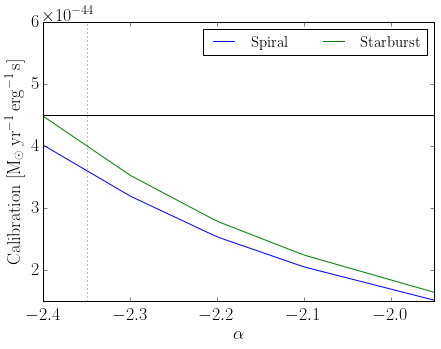

In [4]:
IMF_to_calibration = sn.calibfactorfunc('../Data/Calibration/SFcalibration_spiral.dat')
IMF_to_calibration_SB = sn.calibfactorfunc('../Data/Calibration/SFcalibration_starburst.dat')

alpha = np.linspace(-2.4, -1.95)
Solar_L = 3.82800e33

plt.figure(figsize=(7,5))
plt.plot(alpha, IMF_to_calibration(alpha)/Solar_L, label='Spiral')
plt.plot(alpha, IMF_to_calibration_SB(alpha)/Solar_L, label='Starburst')

plt.hlines(4.5e-44, -2.4, -1.95, color = 'black')
plt.axvline(x=-2.35, color='gray', ls=':')

plt.xlim(-2.40, -1.95)
plt.ylim(0.15e-43, 0.6e-43)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Calibration $[\mathrm{M_{\odot}\,yr^{-1}\,erg^{-1}\,s}]$')
plt.legend(fontsize=15, ncol=2)
plt.savefig('../plots/Calib_alpha_2.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 504x360 with 0 Axes>

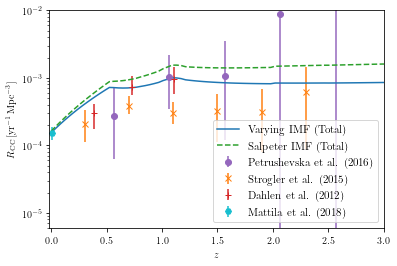

In [11]:
Hubble_high = np.loadtxt('../Data/SN_constraints/Strogler2015_high.txt', usecols=(1,), delimiter=',')
z_hubble, Hubble_mid = np.loadtxt('../Data/SN_constraints/Strogler2015_mid.txt', unpack=True, delimiter=',')
Hubble_low = np.loadtxt('../Data/SN_constraints/Strogler2015_low.txt', usecols=(1,), delimiter=',')

Hubble_high *= 1e-4
Hubble_mid *= 1e-4
Hubble_low *= 1e-4

NOT_high = np.loadtxt('../Data/SN_constraints/Petrushevska2016_high.txt', usecols=(1,), delimiter=',')
z_NOT, NOT_mid = np.loadtxt('../Data/SN_constraints/Petrushevska2016_mid.txt', unpack=True, delimiter=',')
NOT_low = np.loadtxt('../Data/SN_constraints/Petrushevska2016_low.txt', usecols=(1,), delimiter=',')

NOT_high *= 1e-4
NOT_mid *= 1e-4
NOT_low *= 1e-4
NOT_low[-2:] *= 1e-10

z_dahl, low_dahl, mid_dahl, hi_dahl = np.loadtxt('../Data/SN_constraints/Dahlen12.txt', unpack = True)
low_dahl *= 1e-4
mid_dahl *= 1e-4
hi_dahl *=1e-4

z = np.linspace(0,4, 100)

rhoCC_spiral = sn.RCC_density(z,gtype='spiral')
rhoCC_starburst = sn.RCC_density(z,gtype='starburst')
rhoCC_AGNspiral = sn.RCC_density(z,gtype='AGN spiral')
rhoCC_AGNstarburst = sn.RCC_density(z,gtype='AGN starburst')
rhoCC = rhoCC_spiral+rhoCC_starburst+rhoCC_AGNspiral+rhoCC_AGNstarburst

rhoCC_spiral_sal = sn.RCC_density(z,gtype='spiral',salpeter=True)
rhoCC_starburst_sal = sn.RCC_density(z,gtype='starburst',salpeter=True)
rhoCC_AGNspiral_sal = sn.RCC_density(z,gtype='AGN spiral',salpeter=True)
rhoCC_AGNstarburst_sal = sn.RCC_density(z,gtype='AGN starburst',salpeter=True)
rhoCC_sal = rhoCC_spiral_sal+rhoCC_starburst_sal+rhoCC_AGNspiral_sal+rhoCC_AGNstarburst_sal



plt.figure(figsize=(7,5))
fig, ax = plt.subplots()

plt.errorbar(z_NOT, NOT_mid, yerr=[NOT_mid-NOT_low ,NOT_high-NOT_mid], color='C4', marker='o', label='Petrushevska et al. (2016)', ls='none')
plt.errorbar(z_hubble, Hubble_mid, (Hubble_mid-Hubble_low,Hubble_high-Hubble_mid), color='C1', marker='x', label='Strogler et al. (2015)', ls='none')
plt.errorbar(z_dahl, mid_dahl, (mid_dahl-low_dahl, hi_dahl-mid_dahl), color = 'C3', marker ='+', label = 'Dahlen et al. (2012)', ls = 'none')
plt.errorbar(0.003, 1.5e-4, [[0.3e-4], [0.4e-4]], color = 'C9', marker='H', label='Mattila et al. (2018)', ls = 'none')

plt.plot(z,rhoCC,'-', color='C0',label='Varying IMF (Total)')
plt.plot(z,rhoCC_sal,'--', color='C2', label='Salpeter IMF (Total)')

plt.yscale('log')
plt.xlim(-0.02,3.0)
plt.ylim(6e-6,1e-2)
plt.legend(loc='lower right', fontsize=11, ncol=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$R_{\mathrm{CC}} \, \mathrm{[yr^{-1}\,Mpc^{-3}]}$')
plt.savefig('../plots/R_cc_total.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 504x360 with 0 Axes>

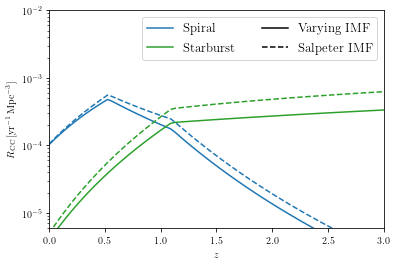

In [12]:
z = np.linspace(0,4, 100)

plt.figure(figsize=(7,5))
fig, ax = plt.subplots()

plt.plot(z,rhoCC_spiral,'-', color='C0', label='Spiral')
plt.plot(z,rhoCC_starburst,'-', color='C2',label='Starburst')

plt.plot(z,rhoCC_spiral_sal,'--', color='C0')
plt.plot(z,rhoCC_starburst_sal,'--', color='C2')

plt.plot([-2,-1],[0,0],'-', color='k', label='Varying IMF')
plt.plot([-2,-1],[0,0],'--', color='k', label='Salpeter IMF')

plt.yscale('log')
plt.xlim(0,3)
plt.ylim(6e-6,1e-2)
plt.legend(loc='upper right', fontsize=13, ncol=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$R_{\mathrm{CC}} \, \mathrm{[yr^{-1}\,Mpc^{-3}]}$')
plt.savefig('../plots/R_cc_split.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 504x360 with 0 Axes>

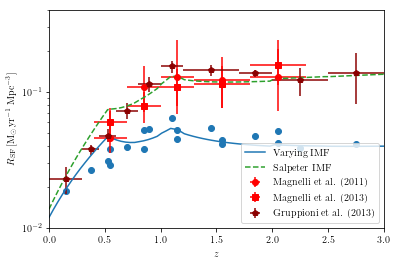

In [19]:
z = np.linspace(0,4, 100)

rhoSF_spiral = sn.RSF_density(z,gtype='spiral')
rhoSF_starburst = sn.RSF_density(z,gtype='starburst')
rhoSF_AGNspiral = sn.RSF_density(z,gtype='AGN spiral')
rhoSF_AGNstarburst = sn.RSF_density(z,gtype='AGN starburst')
rhoSF = (rhoSF_spiral+rhoSF_starburst+rhoSF_AGNspiral+rhoSF_AGNstarburst)

rhoSF_spiral_sal = sn.RSF_density(z,gtype='spiral',usesalpeter=True)
rhoSF_starburst_sal = sn.RSF_density(z,gtype='starburst',usesalpeter=True)
rhoSF_AGNspiral_sal = sn.RSF_density(z,gtype='AGN spiral',usesalpeter=True)
rhoSF_AGNstarburst_sal = sn.RSF_density(z,gtype='AGN starburst',usesalpeter=True)
rhoSF_sal = (rhoSF_spiral_sal+rhoSF_starburst_sal+rhoSF_AGNspiral_sal+rhoSF_AGNstarburst_sal)

m11x, m11xer, m11y, m11yerlo, m11yerhi = np.loadtxt('../Data/SN_constraints/Magnelli_2011.txt', unpack = True)
m13x, m13xer, m13y, m13yerlo, m13yerhi = np.loadtxt('../Data/SN_constraints/Magnelli_2013.txt', unpack = True)
gx, gxer, gy, gyerlo, gyerhi = np.loadtxt('../Data/SN_constraints/Gruppioni_2013.txt', unpack = True)


plt.figure(figsize=(7,5))
fig, ax = plt.subplots()

plt.errorbar(m11x, 10**m11y, xerr=m11xer, yerr=[10**m11y-10**(m11y+m11yerlo), 10**(m11y+m11yerhi)-10**m11y], label = 'Magnelli et al. (2011)', color = 'red', marker = 'o', ls='none')
plt.errorbar(m13x, 10**m13y, xerr=m13xer, yerr=[10**m13y-10**(m13y+m13yerlo), 10**(m13y+m13yerhi)-10**m13y], label = 'Magnelli et al. (2013)', color = 'red', marker = 's', ls='none')
plt.errorbar(gx, 10**gy, xerr=gxer, yerr=[10**gy-10**(gy+gyerlo), 10**(gy+gyerhi)-10**gy], label = 'Gruppioni et al. (2013)', color = 'darkred', marker = 'p', ls='none')

plt.plot(z,rhoSF,'-', color='C0',label='Varying IMF')
plt.plot(z,rhoSF_sal,'--', color='C2', label='Salpeter IMF')

plt.scatter(m11x, 10**m11y * [rhoSF[z<m11x[i]][-1]/rhoSF_sal[z<m11x[i]][-1] for i in range(len(m11x))], color='C0')
plt.scatter(m13x, 10**m13y * [rhoSF[z<m13x[i]][-1]/rhoSF_sal[z<m13x[i]][-1] for i in range(len(m13x))], color='C0')
plt.scatter(gx, 10**gy * [rhoSF[z<gx[i]][-1]/rhoSF_sal[z<gx[i]][-1] for i in range(len(gx))], color='C0')

#plt.arrow(1.75, 0.085, 0, -0.04, length_includes_head=True, color = 'firebrick', width = 0.1, head_width = 0.2, head_length = 0.02, alpha = 0.4)
#plt.text(1.87, 0.048, r'\noindent Observed $R_\mathrm{SF}$ expected\\ to change assuming\\ non-Salpeter IMF', horizontalalignment='left')

plt.yscale('log')
plt.xlim(0,3.0)
plt.ylim(1e-2,4e-1)
plt.legend(loc='lower right', fontsize=10, ncol=1)
plt.xlabel(r'$z$')
plt.ylabel(r'$R_{\mathrm{SF}} \, \mathrm{[M_\odot\,yr^{-1}\,Mpc^{-3}]}$')
plt.savefig('../plots/R_SF_v2.pdf', bbox_inches='tight')
plt.show()

In [17]:
[rhoSF[z<m11x[i]][-1]/rhoSF_sal[z<m11x[i]][-1] for i in range(len(m11x))]

[0.6304308755422696,
 0.48048825174538456,
 0.40838582797099265,
 0.36353409940799186,
 0.32599444863140986]

In [ ]:
E = np.linspace(1,50,100)*sn.MeV

DSNB_spiral = sn.DSNB_galaxy(E,gtype='spiral', SFR2alpha=2.6)
DSNB_starburst = sn.DSNB_galaxy(E,gtype='starburst', SFR2alpha=2.6)
DSNB_AGNspiral = sn.DSNB_galaxy(E,gtype='AGN spiral', SFR2alpha=2.6)
DSNB_AGNstarburst = sn.DSNB_galaxy(E,gtype='AGN starburst', SFR2alpha=2.6)
DSNB = DSNB_spiral+DSNB_starburst+DSNB_AGNspiral+DSNB_AGNstarburst

DSNB_spiral_sal = sn.DSNB_galaxy(E,gtype='spiral',salpeter=True)
DSNB_starburst_sal = sn.DSNB_galaxy(E,gtype='starburst',salpeter=True)
DSNB_AGNspiral_sal = sn.DSNB_galaxy(E,gtype='AGN spiral',salpeter=True)
DSNB_AGNstarburst_sal = sn.DSNB_galaxy(E,gtype='AGN starburst',salpeter=True)
DSNB_salpeter = DSNB_spiral_sal+DSNB_starburst_sal+DSNB_AGNspiral_sal+DSNB_AGNstarburst_sal

KamLAND_E, KamLAND_lim = np.loadtxt('../data/KamLAND.txt', unpack=True)
SK_E, SK_lim = np.loadtxt('../data/SK-I_II_III.txt', unpack=True)
SK4_E, SK4_lim = np.loadtxt('../data/SK-IV.txt', unpack=True)

plt.figure(figsize=(7,5))
fig, ax = plt.subplots()

plt.scatter(SK_E, SK_lim, label=r'SK-I/II/III', marker='x', color='k')
plt.scatter(SK4_E, SK4_lim, label=r'SK-IV', marker='o', color='k')
plt.axvspan(9.3, 31.3, alpha=0.2, color='C3', label='SK Signal Region')

plt.plot(E, DSNB, '-', color='C0',label='Varying IMF')
plt.plot(E, DSNB_salpeter, '--', color='C2', label='Salpeter IMF')

plt.yscale('log')
plt.xlim(0,50)
plt.ylim(1e-3, 10e0)
plt.legend(loc='lower left', fontsize=13)
plt.xlabel(r'$E \, \mathrm{[MeV]}$')
plt.ylabel(r'$\Phi_{\bar{\nu_e}} \, \mathrm{[cm^{-2} \, s^{-1} \, MeV^{-1}]} $')
plt.savefig('../plots/DSNB.pdf', bbox_inches='tight')
plt.show()


C:\Users\Josh\Documents\Texas\DSNB\Python Notebooks\SN_rates.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return Norm*(1+a)**(1+a)*E**a*np.exp(-1*(1+a)*E/Eav)/gamma(1+a)/(Eav**(2+a))
C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 504x360 with 0 Axes>

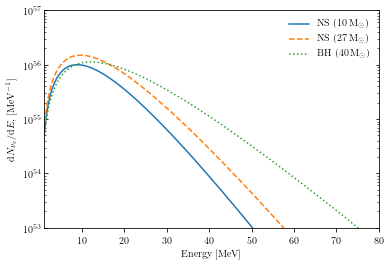

In [18]:
Energies = np.linspace(1, 80, 159)
lowns = sn.FermiDiracfitting('../Data/OSCILLATED_FLUXES/flux_z9_6_ls220.dat')
hins = sn.FermiDiracfitting('../Data/OSCILLATED_FLUXES/flux_s27_ls220.dat')
bh = sn.FermiDiracfitting('../Data/OSCILLATED_FLUXES/flux_BH_s40c.dat')

plt.figure(figsize=(7,5))
fig, ax = plt.subplots()
plt.semilogy(Energies, lowns(Energies), label=r'NS ($10\mathrm{\,M}_{\odot}$)')
plt.semilogy(Energies, hins(Energies), ls='--', label=r'NS ($27\mathrm{\,M}_{\odot}$)')
plt.semilogy(Energies, bh(Energies), ls=':', label=r'BH ($40\mathrm{\,M}_{\odot}$)')

plt.legend(frameon=False)
plt.xlabel(r"Energy [MeV]")
ax.yaxis.set_ticks_position('both')
ax.yaxis.set_tick_params(direction='in', which='both')
plt.ylabel(r"$\mathrm{d}N_{\nu_{\bar{e}}}/\mathrm{d}E, \, [\mathrm{MeV}^{-1}]$")
plt.xlim(1,80)
plt.ylim(1e53,1e57)
plt.savefig('../Plots/Fitting_spectrum.pdf', bbox_inches='tight')
plt.show()

C:\Users\Josh\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


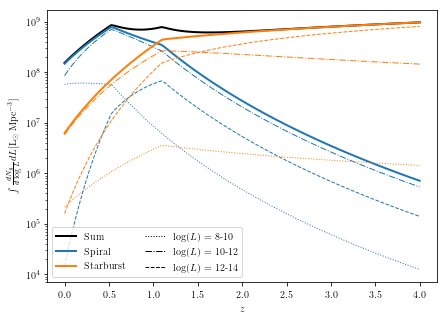

In [3]:
z = np.linspace(0,4,100)
L = np.logspace(8.0,14.0, 120)
plt.figure(figsize=(7,5))
plt.plot(z, integ.simps(sn.Phi_Spiral(L, z), x=L, axis=1) + integ.simps(sn.Phi_Starburst(L, z), x=L, axis=1), color = 'k', linewidth = 2, label = 'Sum')

plt.plot(z, integ.simps(sn.Phi_Spiral(L, z), x=L, axis=1), color = 'C0', linewidth = 2, label = 'Spiral')
plt.plot(z, integ.simps(sn.Phi_Spiral(L[:40], z), x=L[:40], axis=1), ls = ':', color = 'C0', linewidth = 1)
plt.plot(z, integ.simps(sn.Phi_Spiral(L[40:80], z), x=L[40:80], axis=1), ls = '-.', color = 'C0', linewidth = 1)
plt.plot(z, integ.simps(sn.Phi_Spiral(L[80:], z), x=L[80:], axis=1), ls = '--', color = 'C0', linewidth = 1)

plt.plot(z, integ.simps(sn.Phi_Starburst(L, z), x=L, axis=1), color = 'C1', linewidth = 2, label = 'Starburst')
plt.plot(z, integ.simps(sn.Phi_Starburst(L[:40], z), x=L[:40], axis=1), ls = ':', color = 'C1', linewidth = 1)
plt.plot(z, integ.simps(sn.Phi_Starburst(L[40:80], z), x=L[40:80], axis=1), ls = '-.', color = 'C1', linewidth = 1)
plt.plot(z, integ.simps(sn.Phi_Starburst(L[80:], z), x=L[80:], axis=1), ls = '--', color = 'C1', linewidth = 1)

plt.plot([0,1], [-1,-1], label=r'$\log(L)$ = 8-10', color='k', ls=':', linewidth=1)
plt.plot([0,1], [-1,-1], label=r'$\log(L)$ = 10-12', color='k', ls='-.', linewidth=1)
plt.plot([0,1], [-1,-1], label=r'$\log(L)$ = 12-14', color='k', ls='--', linewidth=1)

plt.yscale('log')
plt.legend(ncol = 2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\int \frac{dN_g}{d\log L}dL\mathrm{[L_\odot \,Mpc^{-3}]}$')
plt.savefig('../Plots/Luminosity_funcs.pdf', bbox_inches='tight')
plt.show()